# Proyek Analisis Data: [Bike sharing]
- **Nama:** [Kifatul Najmi]
- **Email:** [kifff.tn@gmail.com]
- **ID Dicoding:** [MC774D5Y2133]

## Menentukan Pertanyaan Bisnis

- Faktor apa yg mempengaruhi jumlah peminjaman sepeda ?
- Bagaimana pengaruh musim terhadap peminat peminjam sepeda ?
- Bagaimana  hari libur nasional (holiday) berdampak pada jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [40]:
day = pd.read_csv('data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
hour = pd.read_csv('data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [42]:
columns = day.columns
column = []
for i in columns:
    column.append(i)
print(f"kolom : {column}")

kolom : ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


**Insight:**
- temp, atemp: suhu aktual dan suhu yang dirasakan (normalized)
- hum: kelembapan
- windspeed: kecepatan angin
- casual, registered, dan cnt: jumlah pengguna sepeda
- plus informasi waktu seperti dteday, season, weekday, dll.

### Assessing Data

In [43]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [44]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [45]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [47]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [48]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- tidak terdapat kekosongan data

### Cleaning Data

In [49]:
print(f"jumlah data duplikasi : {day.duplicated}")

jumlah data duplikasi : <bound method DataFrame.duplicated of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp

In [50]:
print(f"jumlah data duplikasi : {hour.duplicated}")

jumlah data duplikasi : <bound method DataFrame.duplicated of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0        

In [51]:
day = day.drop('instant', axis=1)


In [52]:
hour = hour.drop('instant', axis=1)

In [53]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [55]:
day_clean = day.drop_duplicates(inplace=True)
print(f"jumlah data duplikasi : {day_clean}")

jumlah data duplikasi : None


In [56]:
hour_clean = hour.drop_duplicates(inplace=True)
print(f"jumlah data duplikasi : {hour_clean}")

jumlah data duplikasi : None


In [57]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [58]:
hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [59]:
day.isnull().sum()

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [60]:
hour.isnull().sum()

,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [61]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [62]:
hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [63]:
data = pd.merge(day, hour, how='outer')

In [64]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,2011-01-01,1,0,1,0,6,0,1,0.20,0.2576,0.86,0.0,1,2,3,7.0
1,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,2,0,2,6.0
2,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2.0
3,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1.0
4,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4.0


In [65]:
data.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,18109,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,18109.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501353,0.502457,6.536860,0.028770,3.003534,0.682754,1.423988,0.496926,0.475720,0.627242,0.190104,68.476006,295.173891,363.649898,11.546752
std,NaN,1.107020,0.500008,3.439212,0.167165,2.005677,0.465417,0.635740,0.192182,0.171501,0.191143,0.120848,216.593471,771.573736,950.850819,6.914405
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,6.000000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188839,18.000000,123.000000,152.000000,12.000000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,18.000000


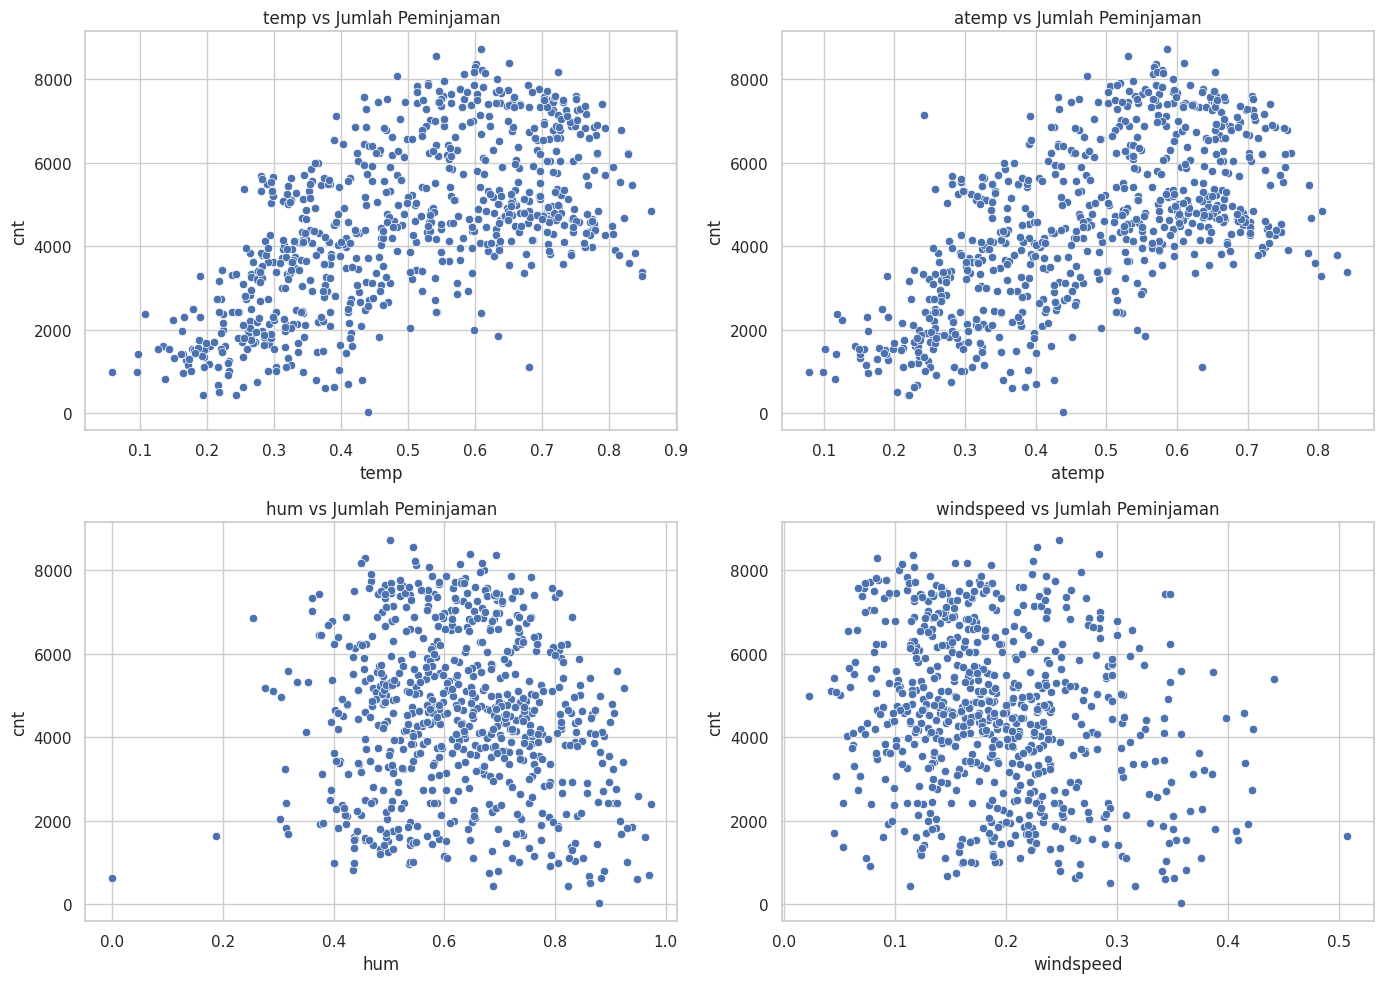

In [66]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=day[col], y=day['cnt'])
    plt.title(f'{col} vs Jumlah Peminjaman')
plt.tight_layout()
plt.show()

**insight :**

Disini agar kita dapat Memahami hubungan antara dua atau lebih variabel, baik numerikal maupun kategorikal.
Scatterplot antara cnt dengan variabel numerikal lainnya penting untuk mengukur seberapa besar pengaruh suhu, kelembapan, kecepatan angin terhadap jumlah peminjaman (cnt).Boxplot cnt berdasarkan season dan workingday penting untuk melihat perbedaan jumlah peminjaman antar kategori

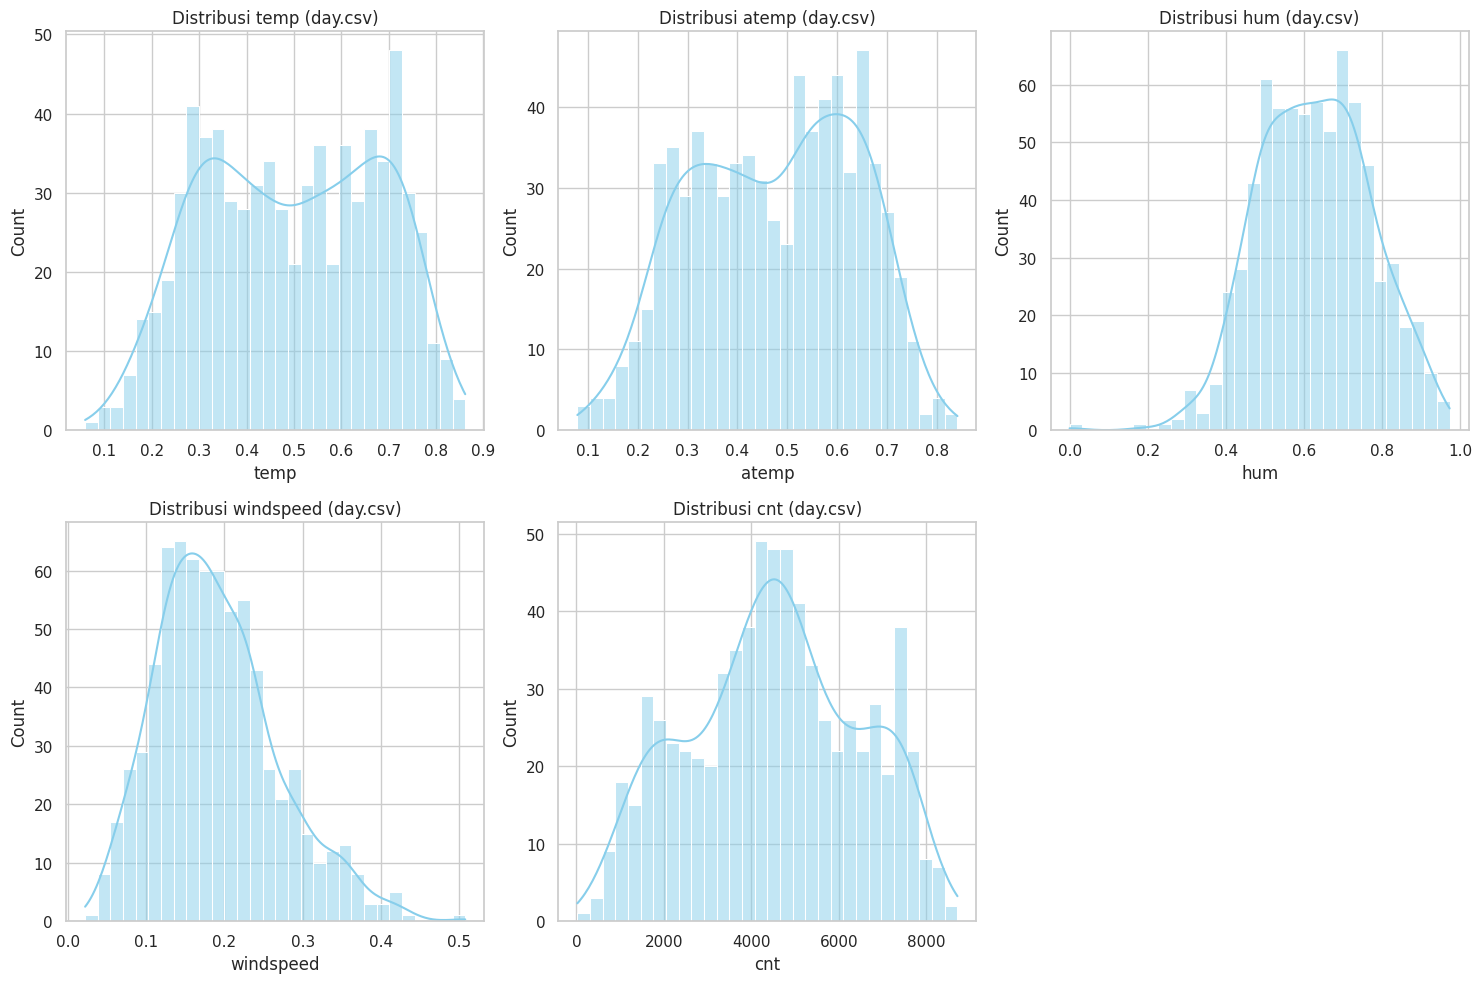

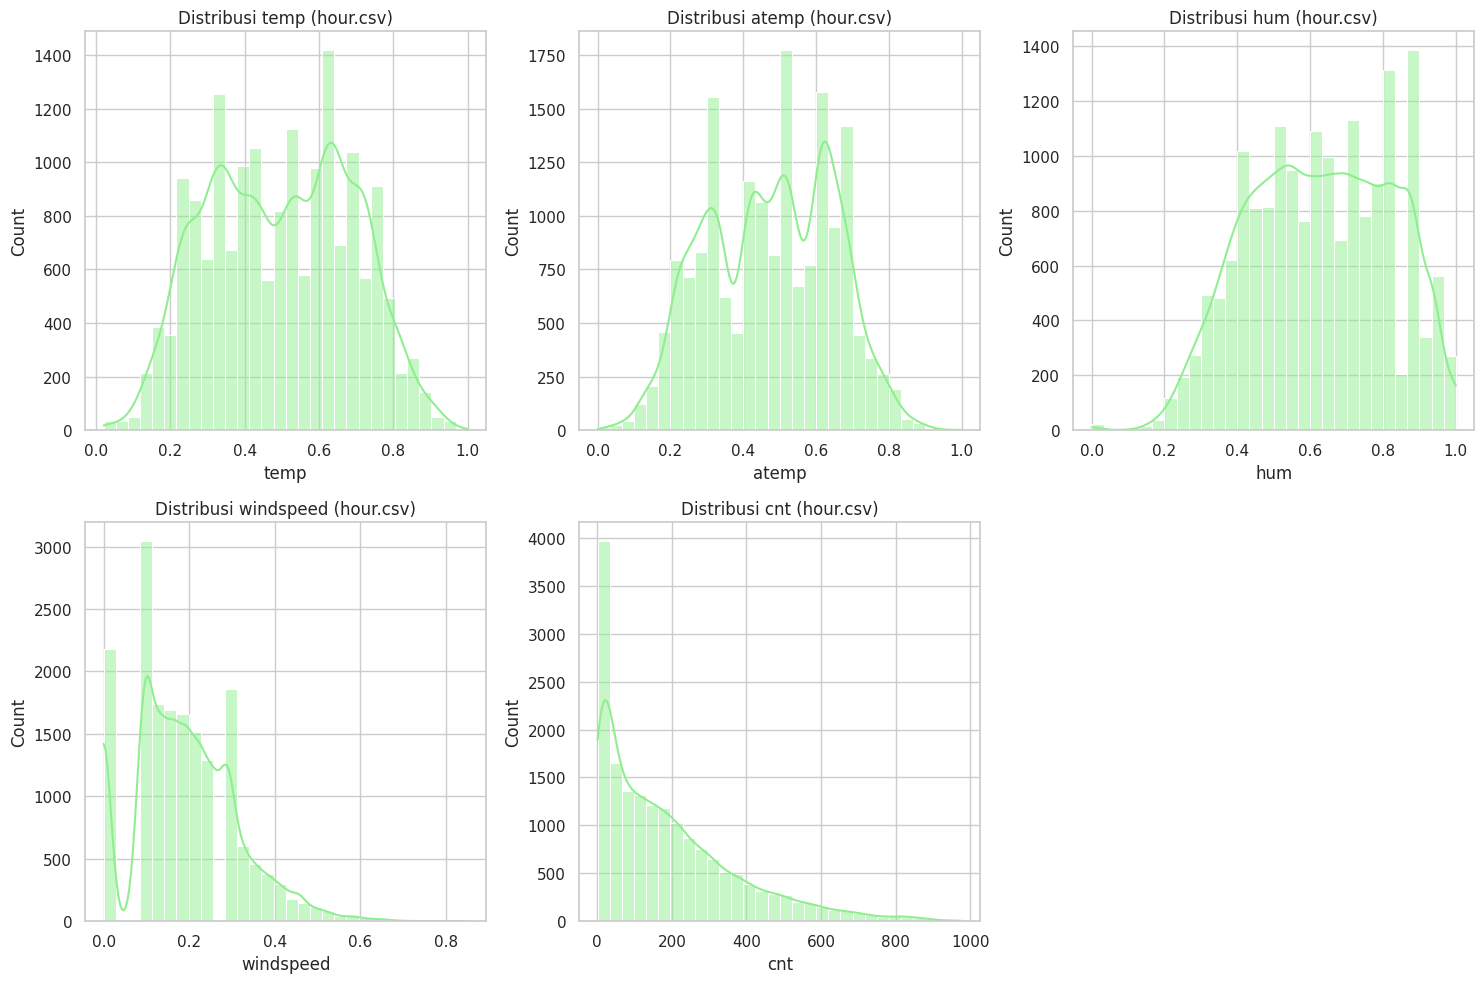

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
day = pd.read_csv("data/day.csv")
hour = pd.read_csv("data/hour.csv")

# Set style
sns.set(style="whitegrid")

# Variabel numerikal yang ingin dicek distribusinya
num_cols_day = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
num_cols_hour = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Plot Distribusi DAY
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_day, 1):
    plt.subplot(2, 3, i)
    sns.histplot(day[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col} (day.csv)')
plt.tight_layout()
plt.show()

# Plot Distribusi HOUR
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_hour, 1):
    plt.subplot(2, 3, i)
    sns.histplot(hour[col], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribusi {col} (hour.csv)')
plt.tight_layout()
plt.show()


**Insight**

* cnt (jumlah peminjaman): Distribusinya miring ke kanan (right-skewed) di hour.csv (artinya banyak jam yang jumlah pinjamannya sedikit). Sedangkan di day.csv, distribusinya mendekati normal.
* temp dan atemp: Sebagian besar data berkumpul pada rentang suhu sedang (sekitar 0.4–0.6 normalisasi skala).
* hum (kelembapan): Banyak data berada di tingkat kelembapan tinggi (sekitar 0.6–0.8), menunjukkan lingkungan cenderung lembap.
windspeed: Kebanyakan berada di kecepatan rendah, jarang ada angin kencang.

**Insight :**

Berdasarkan distribusidata di atas

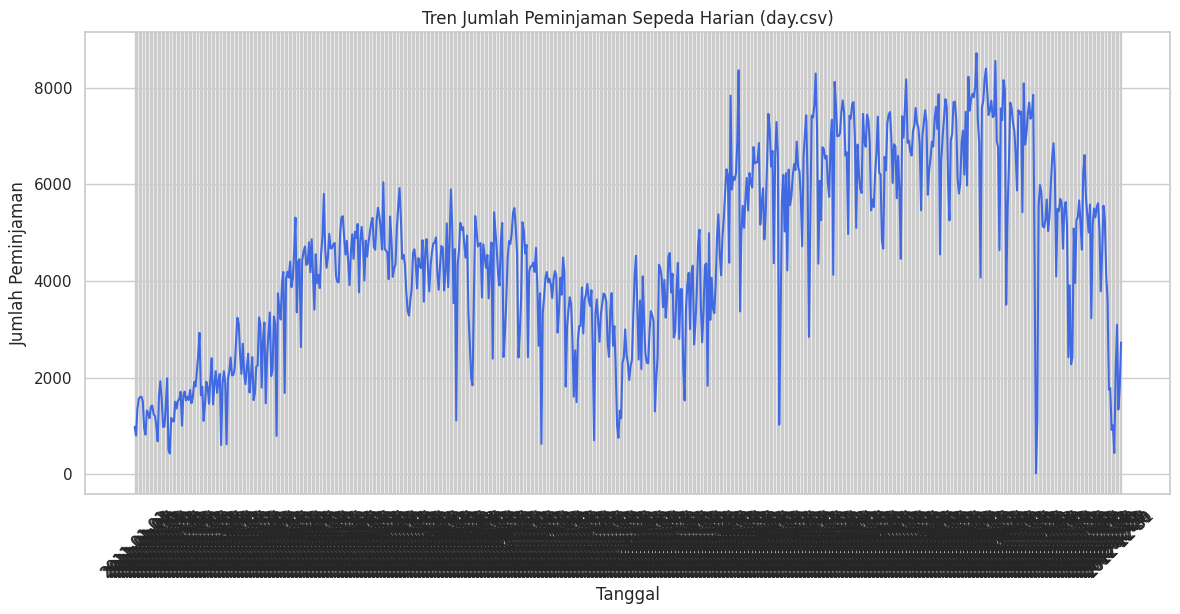

In [68]:
plt.figure(figsize=(14,6))
sns.lineplot(data=day, x='dteday', y='cnt', color='royalblue')
plt.title('Tren Jumlah Peminjaman Sepeda Harian (day.csv)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()


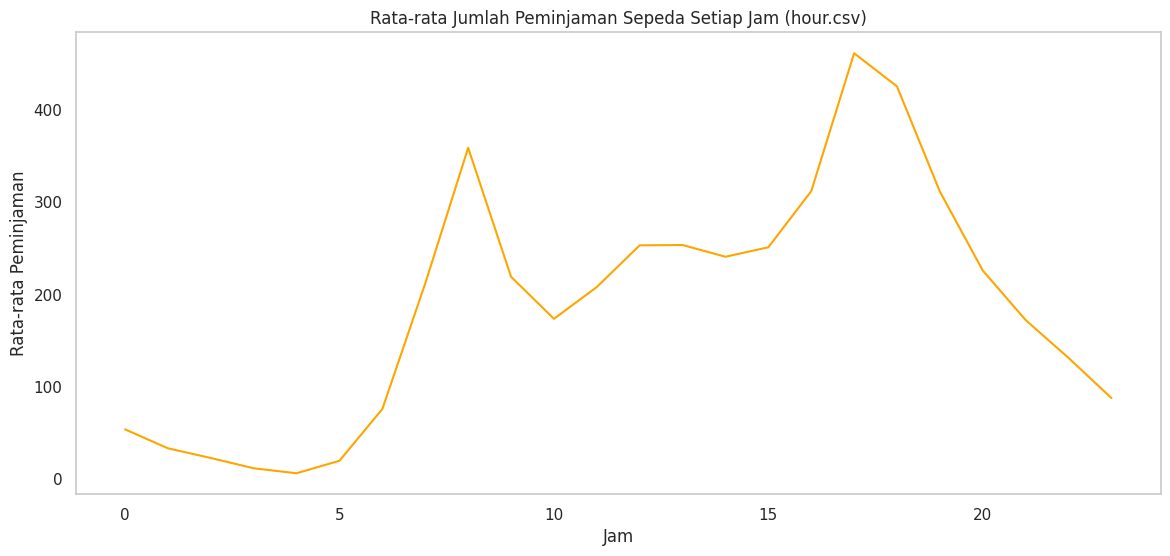

In [69]:
plt.figure(figsize=(14,6))
sns.lineplot(data=hour.groupby('hr')['cnt'].mean(), color='orange')
plt.title('Rata-rata Jumlah Peminjaman Sepeda Setiap Jam (hour.csv)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.grid()
plt.show()


**Insight**

Peminjaman Harian (day.csv): Terlihat ada tren musiman: peningkatan jumlah peminjaman terjadi saat musim panas/musim gugur, menurun saat musim dingin.
Peminjaman per Jam (hour.csv):
* Ada dua puncak dalam satu hari: sekitar jam 08:00 (pagi - berangkat kerja) dan jam 17:00-18:00 (sore - pulang kerja).
* Jam-jam malam dan dini hari sangat rendah penggunaan sepedanya.


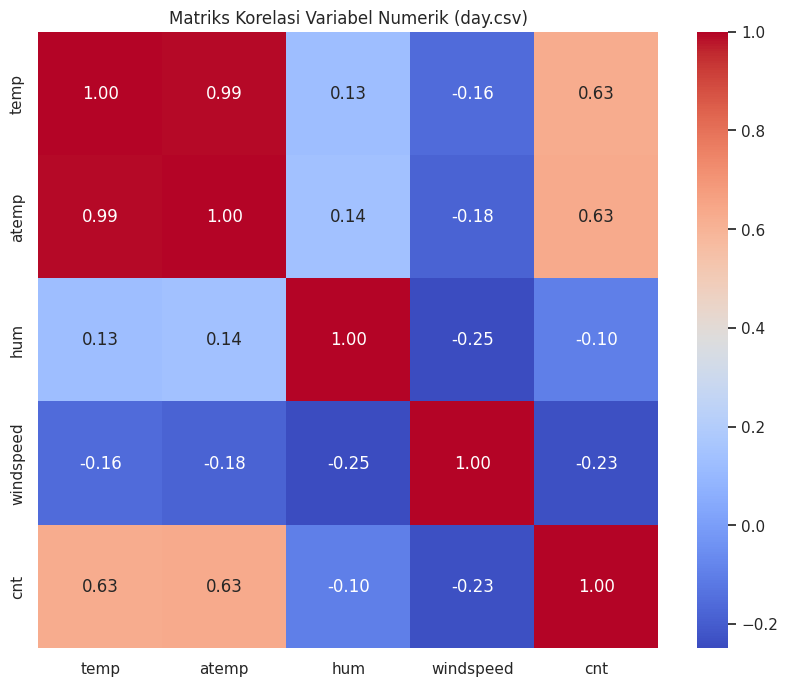

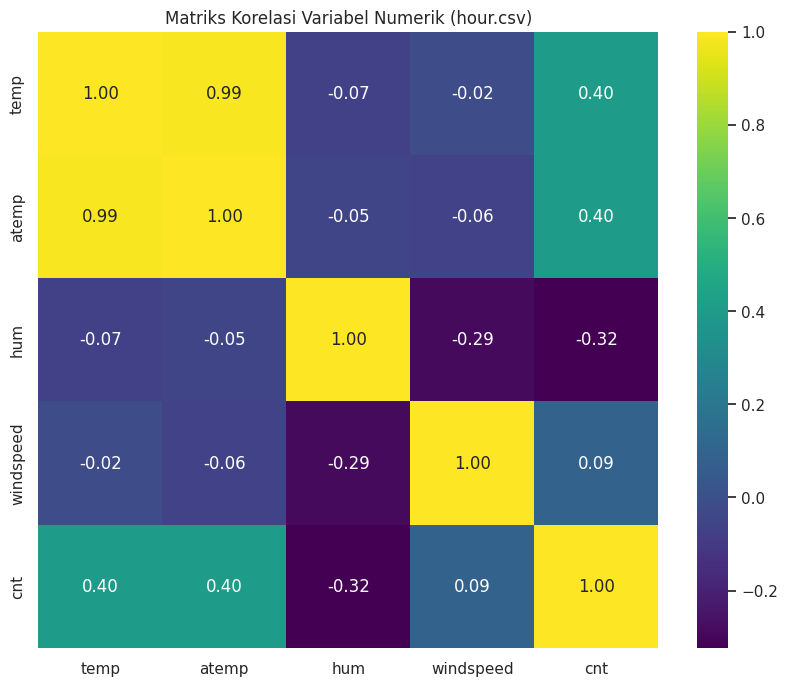

In [70]:
# Korelasi DAY
plt.figure(figsize=(10,8))
sns.heatmap(day[num_cols_day].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik (day.csv)')
plt.show()

# Korelasi HOUR
plt.figure(figsize=(10,8))
sns.heatmap(hour[num_cols_hour].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik (hour.csv)')
plt.show()


**Insight**

Korelasi kuat:
* temp dan atemp sangat berkorelasi positif (>0.98) — wajar karena atemp (apparent temperature) adalah suhu yang dirasakan.
* cnt berkorelasi positif cukup kuat dengan temp (semakin panas, semakin banyak peminjaman).
Korelasi negatif:
* hum dan cnt sedikit negatif — saat kelembapan tinggi, orang cenderung sedikit malas bersepeda.
* windspeed tidak terlalu berpengaruh besar terhadap cnt (korelasi kecil).


In [75]:
# export data ke csv
data.to_csv('dashboard/data.csv', index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

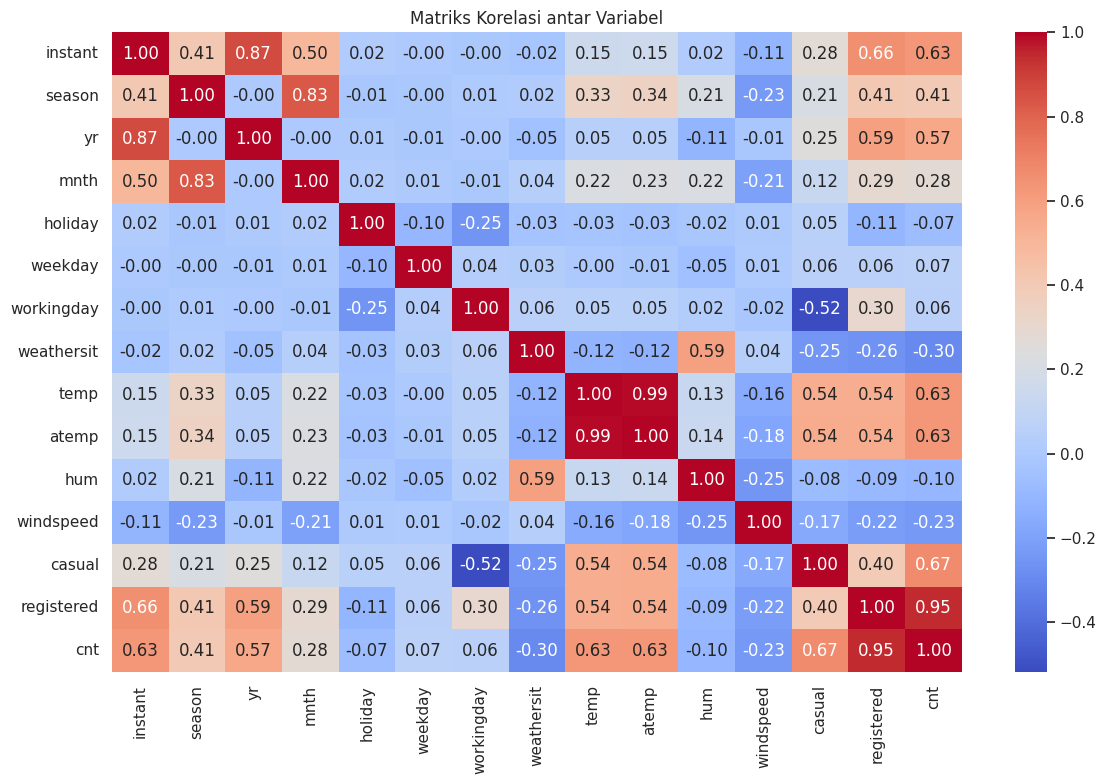

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = day.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi antar Variabel")
plt.tight_layout()
plt.show()

**Faktor apa yg mempengaruhi jumlah peminjaman sepeda ?**

**Berdasarkan visualisasi di atas dapat di simpulkan bahwa :**

- suhu (temp & atemp) mempengaruhi peminjaman sepeda. bahwa jika semakin panas cuacanya maka peminat peminjam ssepeda akan banyak
- cuaca (weathersit)pengaruhnya sangat signifikan yaitu jika cuaca cerah atau berawan peminjamnya banyak kebalikannya untuk cuaca hujan makan sedikit sekali yg meminjam sepeda
- kecepatan angin (winspeed) dan kelembaban (hum) juga berpengaruh terhadap peminjam sepeda walau untuk signifikannya tidah setinggi suhu dan cuaca
- musim (season) juga berpengaruh musim gugur dan musim panas cenderung banyak yg meminjam sepeda

### Pertanyaan 2:

<ipython-input-73-9d450dc05afc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='cnt', data=day, palette='Set2')


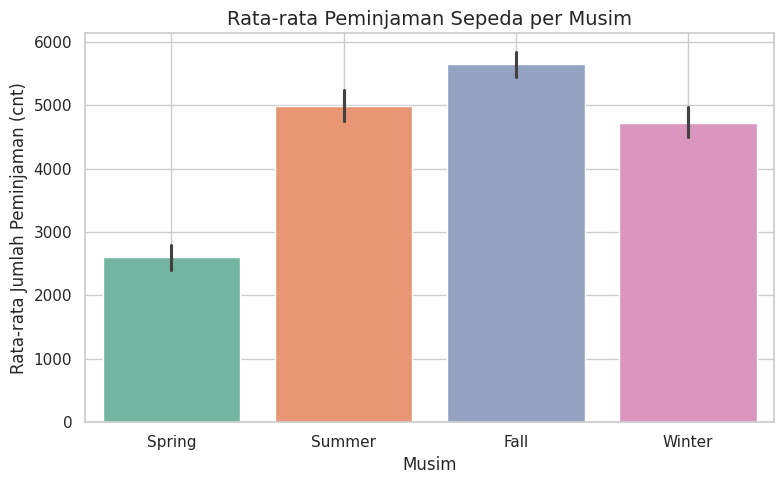

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day['season_label'] = day['season'].map(season_map)

plt.figure(figsize=(8, 5))
sns.barplot(x='season_label', y='cnt', data=day, palette='Set2')
plt.title("Rata-rata Peminjaman Sepeda per Musim", fontsize=14)
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman (cnt)")
plt.tight_layout()
plt.grid(True)
plt.show()

**Bagaimana pengaruh musim terhadap peminat peminjam sepeda ?**

**Beradsarka data di atas dapat di simpulkan bahwa :**
- Data peminjam tertinggi ada pada musim panas
- kemudian di susul oleh musim gugur
- pada musim hujan peminat terus menurun
- peminjam paling sedikit adalah di musim semi

### Pertanyaan 3:

<ipython-input-74-9cadc7c8b3b0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tipe_hari', y='cnt', data=avg_rent_by_daytype, palette='Set2')


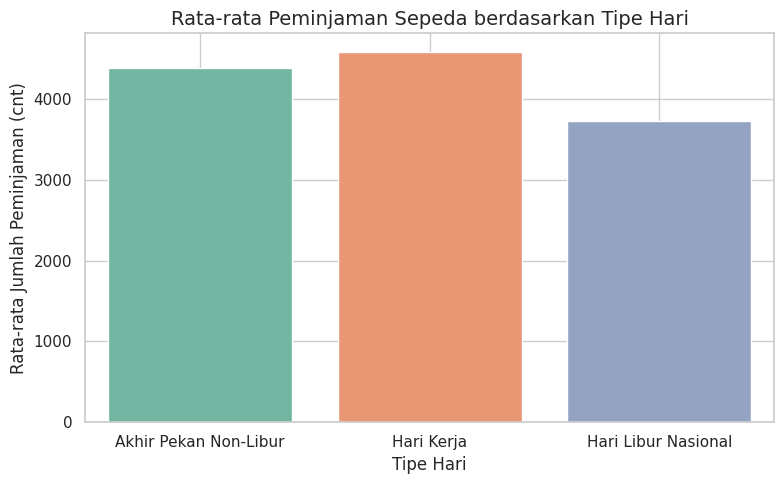

In [74]:
def label_hari(row):
    if row['holiday'] == 1:
        return 'Hari Libur Nasional'
    elif row['workingday'] == 1:
        return 'Hari Kerja'
    else:
        return 'Akhir Pekan Non-Libur'

day['tipe_hari'] = day.apply(label_hari, axis=1)

avg_rent_by_daytype = day.groupby('tipe_hari')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='tipe_hari', y='cnt', data=avg_rent_by_daytype, palette='Set2')
plt.title("Rata-rata Peminjaman Sepeda berdasarkan Tipe Hari", fontsize=14)
plt.xlabel("Tipe Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman (cnt)")
plt.tight_layout()
plt.grid(True)
plt.show()

**Bagaimana hari libur nasional (holiday) berdampak pada jumlah peminjaman sepeda?**
**Beradsarka data di atas dapat di simpulkan bahwa :**

- Data yg saya oleh peminat peminjaman tertinggi adalah hari kerja
- hari libur nasional peminat peminjam rendah di banding akhir pekan dan hari kerja

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Cuaca sangat berpengaruh terhadap jumlah peminjaman sepeda. Terutama suhu , kondisi langit dan angin. Jadi peminjaman sepeda ini sangat bergantung terhadap situasi dan kondisi linkungan untuk beraktifitas


- Conclution pertanyaan 2

musim berpengaruh sangat jelas terhadap peminjaman sepeda. teritama di musim panas dan gugur karena pada musim itu menjadi waktu favorit masyarakat untuk bersepeda


- Conclution pertanyaan 3

ketika hari libur nasional peminjaman sepeda menurun . peminjaman lebih dominan saat hari ketja . hal ini menunjukan sepeda lebih banyak di gunakan untuk kegiatan sehari hari dibanding untuk rekhreasi
